In [4]:
import pandas as pd

kpop1 = pd.read_csv('youtube_kpop1.csv')
kpop2 = pd.read_csv('youtube_kpop2.csv')
kpop3 = pd.read_csv('youtube_kpop3.csv')

kpop = pd.concat([kpop1, kpop2])
kpop = pd.concat([kpop, kpop3])

data= kpop['Comment']
data

text=list(data)
text

['진짜하루에한번씩본다',
 '난이때트와이스가너무좋음..지금트와이스가싫다는게아니라이노래들으면그때생각나고막..어쨌든이때컨셉잘잡았었고ㄹㅇ좋았음.그리고이때죠,챙너무예뻤어..',
 '딱봐도국민걸그룹그자체,,빨리코로나끝나서콘서트가고싶다ㅠㅠ',
 'Sukasemuanya...',
 '트와이스노래는추억이다.유독트와이스노래는그때의기억을떠오르게함',
 '항상트와이스노래를들으면노래처음나왔던그때의향기를불러일으킴..이노래는2018년봄이생각나지..개좋다',
 '이거진짜하루에조회수1만뷰씩늚ㅋㅋㅋㅋ뭐가어떻든간에트와이스가데뷔후5년간수도없이컴백하면서수많은사람들의추억속에매계절매순간마다녹아들어간건분명함..들을때마자추억이떠오르면서행복해져ㅠㅠ+와..또이거쓸때보다5만늚..대단하다진짜..',
 "englishcommentthatyou'vebeenfindingfor.",
 '개인적으로왓이즈럽은다들공주같이풍성한드레스입은게제일레전든듯..2:41특히지효반묶음머리진짜공준줄알았잖아..ㅠㅠ아니근데남팬들목소리봐도봐도적응이안되네ㅋㅋㅋ',
 '아니나만이런건진모르겠는데트와가한참잘나갔던161718노래들으면추억이새록새록떠오름..특히핱쉐랑왓이즈러브',
 '그래도아직은트와이스인이유',
 '개인적으로왓이즈러브에서제일좋은부분은뮤비인거같음.영화를각자패러디했는데볼때마다내가봤었던유명한영화가하나씩나와서신기했음.그리고음방이나뮤뱅이런곳에서도코디를너무잘임힘❤️노래도잘뽑았고거기에더해트와이스사랑스러움이엄청많이묻혀있었던곡이라팬분들이나대중도좋아하는거같음.',
 "이영상을보고나니깐확실히대중들이트와이스한테Fancy,Ican'tstopme같은걸크러쉬한곡을원하는게아니라Whatislove,Heartshaker,TT같은하이틴느낌의곡을원하는듯최근트와이스노래들이데뷔초때기획했던하이틴컨셉의트와이스와안맞는것같은데다음번에는꼭트와이스한테맞는노래가나왔으면좋겠다",
 '이런느낌인곡은하이틴스러워서너무좋음사랑에빠진하이틴학생들이하는것같음그나저나울채영많이이뻐졌네~~~',
 '"TWICEonlyhasfanboys"Likethiscommentifyouareagirlonce.Iwantto

In [5]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer=twitter_tag.nouns, #우선은 명사만 사용
                      decode_error ='ignore', 
                      max_df=0.5, #너무 자주 나타나는 단어는 제외, 책에서는 0.15를 사용
                      #min_df = 3, #3개 미만의 문서에서 나타난 단어는 제외, 여기서는 max_features를 1000으로 제한하므로 별 필요 없음
                      max_features = 1000) #적당한 대상 단어 수를 선택
review_cv = vec.fit_transform(text)

In [6]:
review_cv.shape

(3989, 1000)

In [7]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수를 지정
                                max_iter=25, #max_iter는 최종 모형에서는 5,000~10,000번 시도한다고 알려져 있음
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                #topic_word_prior: beta, doc_topic_prior: alpha
                                #일반적으로 beta는 0.1로 고정하고 alpha를 50/topic의 수 근처의 값을 시도
                                #alpha와 beta는 낮은 값을 사용할수록 특정 토픽들이 두드러지도록 하는 효과가 있다고 합
                                learning_method='batch', #'batch'는 'online'에 비해 더 성능이 좋고 느림, 현재는 default
                                n_jobs= -1, #사용 processor 수, None이면 1, -1이면 모두 사용
                                random_state=0)

review_topics = lda.fit_transform(review_cv)

In [8]:
print('topic-word distribution dimension:', lda.components_.shape)
print('document-topic distribution dimenstion', review_topics.shape)

topic-word distribution dimension: (10, 1000)
document-topic distribution dimenstion (3989, 10)


In [9]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

In [10]:
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 노래, 나, 나연, 좀, 상큼, 왓이즈럽, 지금, 뭔가, 응원, 걸
Topic #1: 사람, 파트, 멤버, 느낌, 때, 목소리, 처음, 애, 더, 노래
Topic #2: 살짝, 거, 보고, 영상, 썸네일, 난, 또, 데, 조회, 공주
Topic #3: 트와이스, 때, 곡, 팬, 그룹, 제일, 왓, 트, 컨셉, 댓글
Topic #4: 컨셉, 편집, 교차, 레전드, 생각, 매력, 때, 계속, 우리, 틴
Topic #5: 미미, 마이걸, 사랑, 해, 입덕, 효정, 한번, 린, 최애, 항상
Topic #6: 왜, 카메라, 존나, 뭐, 최고, 웨이브, 부분, 개, 옴걸, 멀리
Topic #7: 효, 이번, 유아, 비니, 지호, 완전, 승희, 찰떡, 랩, 정이
Topic #8: 진짜, 승희, 언니, 머리, 얼굴, 심장, 핑크, 눈, 세상, 춤
Topic #9: 방탄, 무대, 회수, 아이돌, 라이브, 아미, 정말, 춤, 뮤비, 정도



In [11]:
twitter_tag.nouns(text[1])

['난이',
 '때',
 '트와이스',
 '지금',
 '트와이스',
 '라이노',
 '그때',
 '고막',
 '어쨌든',
 '때',
 '컨셉',
 '때',
 '챙']

In [12]:
def tokenizer(str):
    return [token for token in twitter_tag.nouns(str) if len(token) > 1]

In [13]:
tokenizer(text[1])

['난이', '트와이스', '지금', '트와이스', '라이노', '그때', '고막', '어쨌든', '컨셉']

In [14]:
#count vector 새로 생성
vec = CountVectorizer(tokenizer=tokenizer, decode_error ='ignore', 
                      max_df=0.5, max_features = 1000) #너무 자주 나타나는 단어는 제외
review_cv = vec.fit_transform(text)

In [16]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 50, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)

Topic #0: 매력, 기분, 인기, 보기, 진짜, 티비, 가가, 시험, 구독, 도해
Topic #1: 멤버, 누구, 퀸덤, 인생, 절대, 혼자, 정호석, 점점, 천재, 이후
Topic #2: 승희, 오늘, 다현, 콘서트, 썸넬, 정석, 눈치, 요정, 머리카락, 베레모
Topic #3: 얼굴, 음색, 세계, 소녀, 때문, 시크, 보임, 시절, 가왜, 먼저
Topic #4: 나연, 그때, 채영, 미나, 모모, 팬시, 신의한수, 티티, 하자, 쯔위
Topic #5: 라이브, 조회, 지호, 민윤기, 김태형, 밴드, 청순, 논스탑, 힐링, 띵곡
Topic #6: 트와이스, 제일, 다시, 사나, 귀염, 이하, 학생, 분홍색, 프로, 가보
Topic #7: 이번, 머리, 찰떡, 핑크, 보라, 웃음, 화이팅, 심쿵, 블랙, 다해
Topic #8: 비니, 한번, 단발, 스타, 이제, 대중, 일링, 변화, 고막, 무슨
Topic #9: 노래, 진짜, 존예, 누나, 생머리, 창섭, 발전, 중단, 레알, 아침
Topic #10: 응원, 거의, 댄스, 표현, 진짜, 노래, 호석, 미소, 기준, 예스
Topic #11: 아이돌, 왓이즈럽, 데뷔, 얼마나, 안보, 데이, 연습, 음악, 논란, 한국
Topic #12: 하이, 앨범, 스타일, 순간, 와중, 트와이스, 코로나, 남팬, 살이, 뭐해
Topic #13: 사람, 볼때, 마이크, 간지, 박진영, 난이, 거나, 김다현, 박지, 작곡
Topic #14: 유아, 효정, 지호, 정언, 학교, 별로, 일단, 막내, 몽환, 부터
Topic #15: 살짝, 얘기, 매일, 다른, 비주, 전부, 만해, 무인도, 세트, 메이크업
Topic #16: 카메라, 웨이브, 멀리, 하이라이트, 역대, 가요, 존멋, 관련, 적임, 표정
Topic #17: 마이걸, 최고, 옴걸, 여신, 강림, 오지, 대중성, 자의, 려고, 비트
Topic #18: 방탄, 부분, 우리, 소리, 렁꿀렁, 악플, 잠깐, 가나, 염색, 개념
Topic #19: 진짜, 역시, 덕질,

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5) #5개 클러스터로 분류
kmeans.fit(lda.components_)

print('topic-word distribution dimension:', lda.components_.shape)
print('Cluster label:', kmeans.labels_)

topic-word distribution dimension: (50, 1000)
Cluster label: [0 0 3 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 4 0 0 0 0]


In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_review = tsne.fit_transform(lda.components_)
print('TSNE dimension:', tsne_review.shape)
tsne_review[:,0]

TSNE dimension: (50, 2)


array([  38.184593 , -147.5404   , -144.3757   ,   21.380346 ,
       -191.13982  ,  -67.01268  , -241.16055  ,  -21.557035 ,
        -36.340714 , -724.29156  ,  -49.322285 ,  144.61652  ,
        -21.444965 , -197.9387   ,  241.37805  , -310.03116  ,
         22.714027 ,  318.38477  , -296.5259   ,   39.494236 ,
       -118.15449  ,   -3.2164233, -132.30489  ,  -71.032326 ,
        149.00438  ,  212.21408  ,   71.95188  ,  107.6653   ,
         -9.0169735,  -71.6594   , -107.44385  ,   48.500633 ,
        192.46558  ,   76.04867  ,   -1.7543402, -131.41544  ,
         85.69074  ,  171.21255  ,   66.105545 , -156.03073  ,
        -11.249936 ,  127.83129  ,  298.0247   ,  -69.5433   ,
       -304.68518  ,  103.29632  ,  216.38336  , -138.0749   ,
       -206.47655  ,    1.7936779], dtype=float32)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

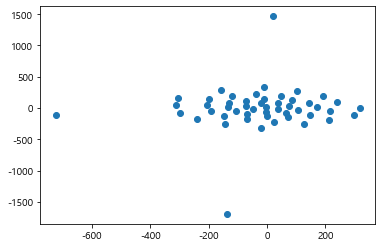

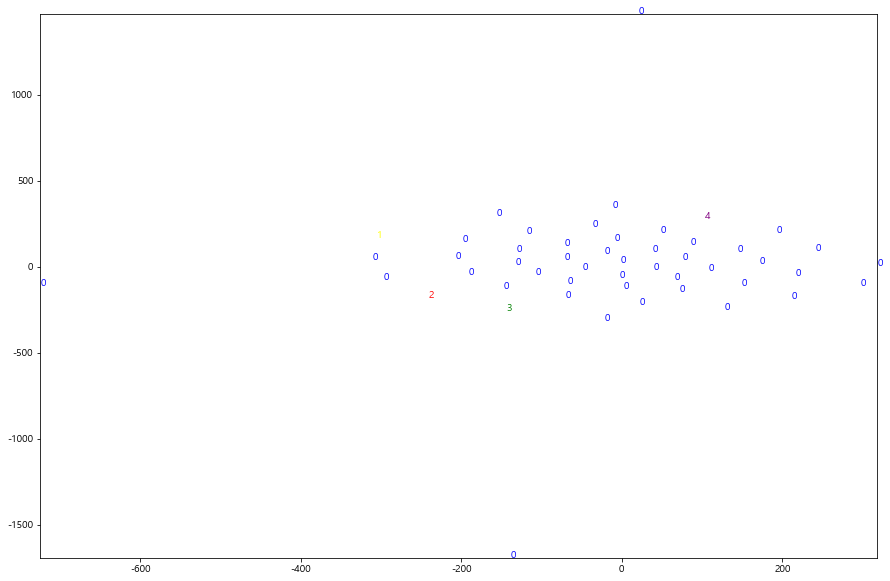

In [20]:
colors = {0:'blue', 1:'yellow', 2:'red', 3:'green', 4:'purple'}
x1 = tsne_review[:,0]
x2 = tsne_review[:,1]
plt.scatter(x1, x2)

plt.figure(figsize=(15,10))
plt.xlim(min(x1), max(x1))
plt.ylim(min(x2), max(x2))
for i in range(len(x1)):
#    plt.text(X1_lsi[i], X2_lsi[i], sample_label[i],
#            color = colors[sample_label[i]])
    plt.text(x1[i], x2[i], kmeans.labels_[i],
            color = colors[kmeans.labels_[i]])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos, fontsize=30)
plt.show()

#아래 결과를 보면 각 topic들이 고르게 분포하고 있어, 클러스터링이 별로 의미 없음을 알 수 있음

In [21]:
lda.perplexity(review_cv)

865.1983547161668

In [22]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 25, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=2.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 진짜, 매력, 정이, 기분, 가장, 최애, 스타, 노래, 인기, 미미
Topic #1: 멤버, 비니, 존나, 요즘, 얼굴, 이름, 분위기, 누구, 목소리, 퀸덤
Topic #2: 승희, 노래, 미미, 오늘, 진짜, 아이돌, 갑자기, 이곡, 진심, 돌핀
Topic #3: 얼굴, 친구, 세계, 오마이, 소녀, 때문, 여름, 계속, 진짜, 하반기
Topic #4: 컨셉, 나연, 왓이즈럽, 러브, 그냥, 하트, 실력, 채영, 미나, 모모
Topic #5: 진짜, 라이브, 조회, 노래, 드레스, 계속, 민윤기, 김태형, 승희, 모두
Topic #6: 제일, 정도, 진짜, 소리, 노래, 다현, 다시, 안무, 사나, 트와이스
Topic #7: 언니, 이번, 머리, 찰떡, 핑크, 앞머리, 진짜, 보라, 여자, 음색
Topic #8: 영상, 한번, 여기, 댓글, 뮤비, 시작, 이건, 이제, 관심, 콘서트
Topic #9: 진짜, 처음, 뭔가, 노래, 미미, 단발, 개인, 존예, 목소리, 약간
Topic #10: 트와이스, 노래, 컴백, 그때, 추억, 응원, 해도, 댄스, 거의, 표현
Topic #11: 진짜, 지금, 걸그룹, 노래, 언니, 생각, 아이돌, 옛날, 소름, 그룹
Topic #12: 사랑, 느낌, 하루, 하이, 앨범, 언제, 목소리, 스타일, 번만, 자꾸
Topic #13: 사람, 진짜, 볼때, 노래, 마이크, 설랬, 쯔위, 간지, 얼마나, 흑발
Topic #14: 미미, 유아, 지호, 효정, 진짜, 정언, 조금, 학교, 별로, 심장
Topic #15: 살짝, 무대, 의상, 타팬, 얘기, 생각, 코디, 매일, 가수, 다른
Topic #16: 카메라, 보고, 웨이브, 멀리, 태형, 표정, 하이라이트, 진짜, 역대, 완전
Topic #17: 마이걸, 최고, 옴걸, 중독, 대박, 여신, 개멋, 외모, 강림, 청량
Topic #18: 방탄, 우리, 입덕, 남자, 이유, 진심, 진짜, 도안, 취향, 렁꿀렁
Topic #19: 아미, 진짜, 생각, 정말, 리

682.9144353205672

In [23]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 10, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 미미, 승희, 이번, 유아, 비니, 파트, 지호, 효정, 매력, 정이
Topic #1: 존나, 멤버, 그룹, 정말, 지금, 생각, 진심, 하나, 기분, 태형
Topic #2: 살짝, 방탄, 입덕, 라이브, 아미, 심장, 응원, 소리, 오늘, 타팬
Topic #3: 나연, 얼굴, 진짜, 정도, 그냥, 걸그룹, 항상, 친구, 남자, 드레스
Topic #4: 트와이스, 컨셉, 노래, 느낌, 제일, 상큼, 왓이즈럽, 러브, 하트, 하이
Topic #5: 카메라, 보고, 편집, 회수, 교차, 웨이브, 부분, 썸네일, 뮤비, 멀리
Topic #6: 사랑, 사람, 레전드, 최고, 우리, 옴걸, 세상, 하루, 마이크, 쯔위
Topic #7: 진짜, 언니, 머리, 목소리, 완전, 찰떡, 핑크, 앞머리, 단발, 정언
Topic #8: 무대, 영상, 아이돌, 한번, 댓글, 여기, 컴백, 의상, 실력, 역시
Topic #9: 노래, 마이걸, 처음, 계속, 뭔가, 대박, 개인, 중독, 표정, 존예



465.5539265152852

In [29]:
#topic modeling 수행
lda = LatentDirichletAllocation(n_components = 3, max_iter=25, 
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1,
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda,vec.get_feature_names(), 10)
lda.perplexity(review_cv)

Topic #0: 진짜, 승희, 미미, 언니, 이번, 유아, 머리, 카메라, 비니, 파트
Topic #1: 진짜, 마이걸, 사랑, 살짝, 존나, 보고, 편집, 나연, 회수, 사람
Topic #2: 노래, 트와이스, 컨셉, 방탄, 무대, 영상, 생각, 아이돌, 그룹, 느낌



430.52088457508677